In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2,d1,d2,u1,u2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, u1, u2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + u1 * x1 * x1 * x1 - k2 * (x1 - x2 - L2) + u2 * (x1 - x2) * (x1 - x2) * (x1 - x2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + u2 * (x2 - x1) * (x2 - x1) * (x2 - x1)) / m2]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Coeficientes de amortiguamiento
b1 = 0.0
b2 = 0.0
# Coeficientes de no-linealidad
u1 = -1.0/6.0
u2 = -0.1

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = -0.5
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50
numpoints = 1250


# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('31.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

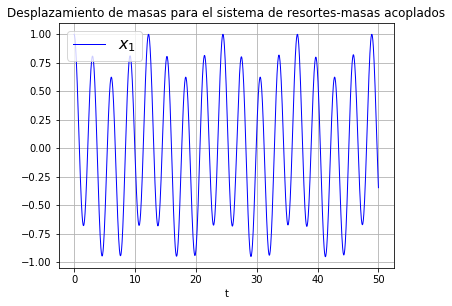

In [3]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, y1, x2, y2 = loadtxt('31.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)


legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento de masas para el sistema de resortes-masas acoplados')
savefig('31_d1.png', dpi=100)

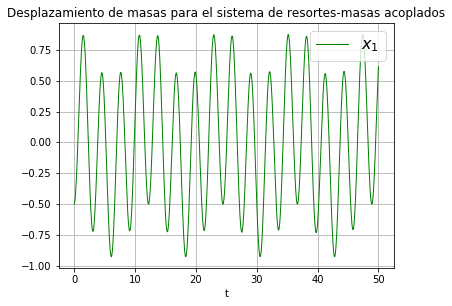

In [4]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, y1, x2, y2 = loadtxt('31.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(t, x2, 'g', linewidth=lw)


legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento de masas para el sistema de resortes-masas acoplados')
savefig('31_d2.png', dpi=100)




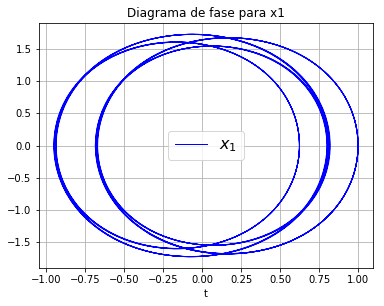

In [5]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, y1, x2, y2 = loadtxt('31.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)


legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Diagrama de fase para x1')
savefig('31_f1.png', dpi=100)

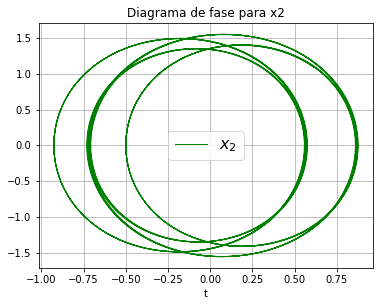

In [6]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, y1, x2, y2 = loadtxt('31.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(x2, y2, 'g', linewidth=lw)


legend((r'$x_2$', r'$x_2$'), prop=FontProperties(size=16))
title('Diagrama de fase para x2')
savefig('31_f2.png', dpi=100)

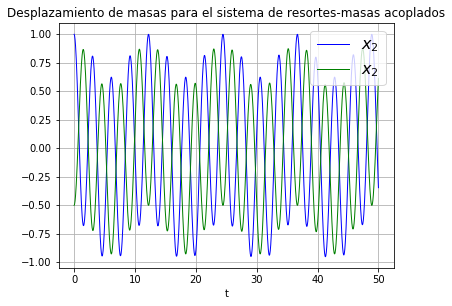

In [7]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, y1, x2, y2 = loadtxt('31.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_2$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento de masas para el sistema de resortes-masas acoplados')
savefig('31_d12.png', dpi=100)

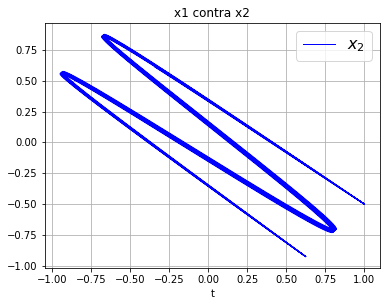

In [8]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline
t, x1, y1, x2, y2 = loadtxt('31.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)


legend((r'$x_2$', r'$x_2$'), prop=FontProperties(size=16))
title('x1 contra x2')
savefig('31_v.png', dpi=100)

In [9]:

# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Coeficientes de amortiguamiento
b1 = 0.0
b2 = 0.0
# Coeficientes de no-linealidad
u1 = -1.0/6.0
u2 = -0.1

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -0.5
y1 = 1.0/2.0
x2 = 3.001
y2 = 5.9

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50
numpoints = 1250


# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('32.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

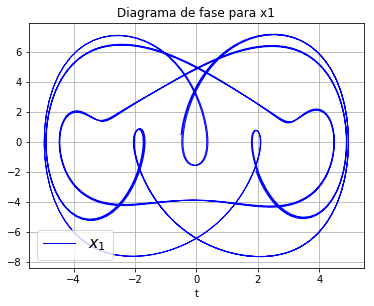

In [10]:


from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('32.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Diagrama de fase para x1')
savefig('32_f1.png', dpi=100)



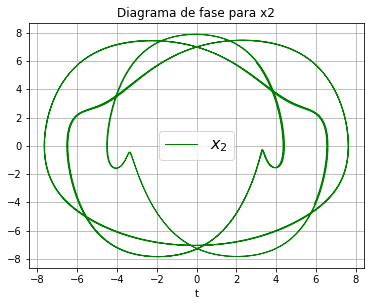

In [11]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('32.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(x2, y2, 'g', linewidth=lw)

legend((r'$x_2$', r'$x_2$'), prop=FontProperties(size=16))
title('Diagrama de fase para x2')
savefig('32_f2.png', dpi=100)

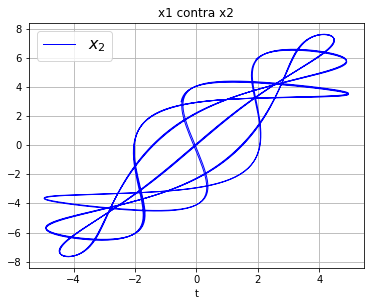

In [12]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('32.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)

legend((r'$x_2$', r'$x_2$'), prop=FontProperties(size=16))
title('x1 contra x2')
savefig('32_v.png', dpi=100)

In [13]:


from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0
# Nonlinear components
u1 = -1.0/6.0
u2 = -0.1

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -0.6
y1 = 0.5
x2 = 3.001
y2 = 5.9

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 200.0
numpoints = 4000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('33.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3],file=f)



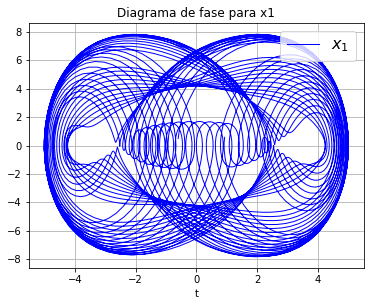

In [14]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('33.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Diagrama de fase para x1')
savefig('33_f1.png', dpi=100)

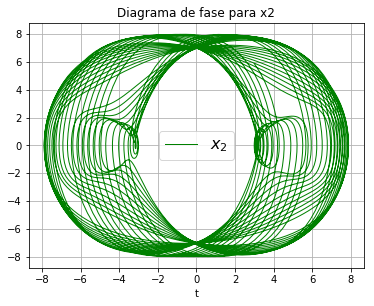

In [15]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('33.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(x2, y2, 'g', linewidth=lw)

legend((r'$x_2$', r'$x_2$'), prop=FontProperties(size=16))
title('Diagrama de fase para x2')
savefig('33_f2.png', dpi=100)

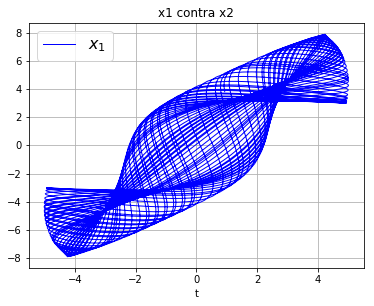

In [16]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('33.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('x1 contra x2')
savefig('33_v.png', dpi=100)

In [17]:
import numpy as np
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2,d1,d2,u1,u2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, u1, u2, f1, f2, q1, q2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + u1 * x1**3 - k2 * (x1 - x2 - L2) + u2 * (x1 - x2)**3 + f1*(np.cos(q1*t))) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + u2 * (x2 - x1)**3 + f2*(np.cos(q2*t))) / m2]
    return f

In [18]:
from scipy.integrate import odeint
import numpy as np

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 2.0/5.0
k2 = 1.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 1.0/10.0
b2 = 1.0/5.0
# Nonlinear components
u1 = 1.0/6.0
u2 = 0.1
# Forcing Amplitudes
f1 = 1.0/3.0
f2 = 1.0/5.0
# Forcing Frequencies
q1 = 1.0
q2 = 3.0/5.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0.0
x2 = 0.1
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 170.0
numpoints = 2250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2, f1, f2, q1, q2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('41.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3],file=f)

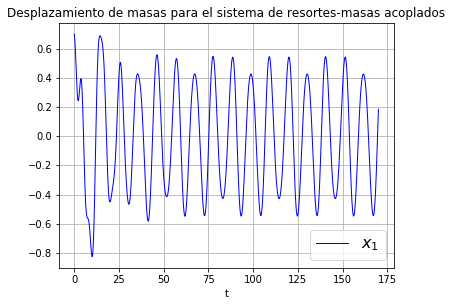

In [19]:
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('41.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot( t, x1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento de masas para el sistema de resortes-masas acoplados')
savefig('41_d1.png', dpi=100)

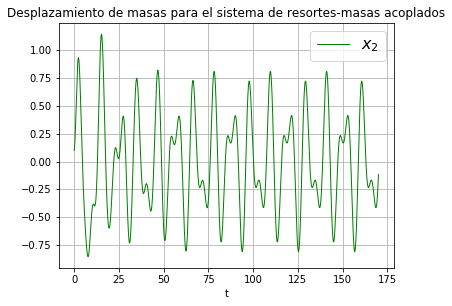

In [20]:
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('41.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot( t, x2, 'g', linewidth=lw)

legend((r'$x_2$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento de masas para el sistema de resortes-masas acoplados')
savefig('41_d2.png', dpi=100)

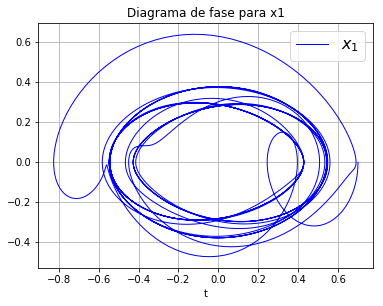

In [24]:

from numpy import loadtxt
from pylab import figure, plot, xlabel, ylabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('41.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Diagrama de fase para x1')
savefig('41_f1.png', dpi=100)

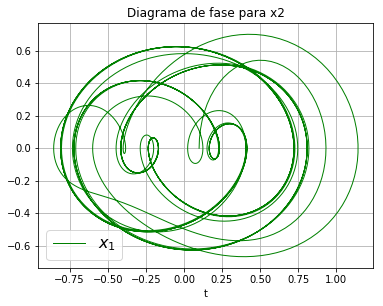

In [23]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, ylabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('41.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(x2, y2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Diagrama de fase para x2')
savefig('41_f2.png', dpi=100)

In [27]:
from scipy.integrate import odeint
import numpy as np

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 2.0/5.0
k2 = 1.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 1.0/10.0
b2 = 1.0/5.0
# Nonlinear components
u1 = 1.0/6.0
u2 = 0.1
# Forcing Amplitudes
f1 = 1.0/3.0
f2 = 1.0/5.0
# Forcing Frequencies
q1 = 1.0
q2 = 3.0/5.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0.0
x2 = 0.1
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 3000.0
numpoints = 2250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2, f1, f2, q1, q2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('41_1.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3],file=f)

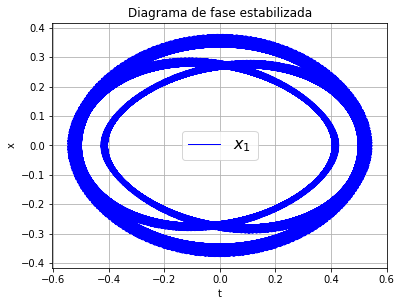

In [29]:
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('41_1.dat', unpack=True, skiprows=752)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1

plot( x1, y1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Diagrama de fase estabilizada')
savefig('41_fe1.png', dpi=100)

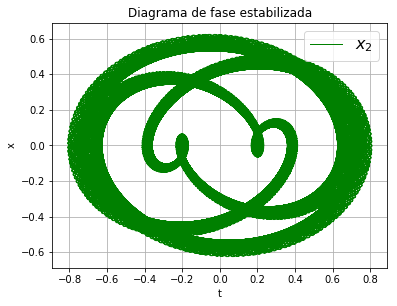

In [30]:
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('41_1.dat', unpack=True, skiprows=752)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1

plot( x2, y2, 'g', linewidth=lw)

legend((r'$x_2$', r'$x_2$'), prop=FontProperties(size=16))
title('Diagrama de fase estabilizada')
savefig('41_fe2.png', dpi=100)

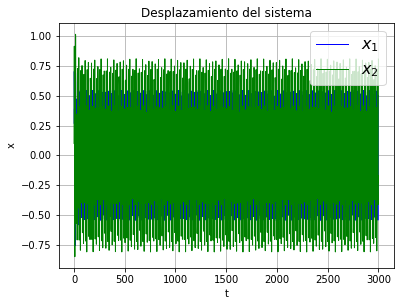

In [31]:

%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('41_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1

plot( t, x1, 'b', linewidth=lw)
plot( t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento del sistema')
savefig('41_d12.png', dpi=100)

In [ ]:



%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('41_1.dat', unpack=True, skiprows=500)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1.0

plot( x1, x2, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica $x_1$ contra $x_2$')
savefig('41.png', dpi=100)

